## Linear and ensemble Regression model creation and evaluation

In this notebook I have created a Linear Regression model and 3 Ensemble models RandomForestRegressor, AdaBoostRegressor and  GradientBoostingRegressorr for Mortgage rate prediction and chosed the best one for evaluation

In [1]:
#Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../Data/fred_mortg_data_clean.csv')

In [3]:
df.head()

,DATE,MORTGAGE30US,FEDFUNDS,GS10,MICH,UNRATE,USREC,CSUSHPISA,MSACSR,GDP
0,1987-01-02,9.37,6.43,7.08,2.9,6.6,0,63.965,6.0,37132.0
1,1987-01-09,9.32,6.43,7.08,2.9,6.6,0,63.965,6.0,37132.0
2,1987-01-16,9.21,6.43,7.08,2.9,6.6,0,63.965,6.0,37132.0
3,1987-01-23,9.04,6.43,7.08,2.9,6.6,0,63.965,6.0,37132.0
4,1987-01-30,9.08,6.43,7.08,2.9,6.6,0,63.965,6.0,37132.0


In [4]:
X = df.drop(columns= ['DATE','MORTGAGE30US'])
y = df['MORTGAGE30US']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ordinary Linear Regression

In [6]:
#Instantiate Grid search pipeline for Ordinary Linear Regression

pipe_lr = Pipeline([('lr', LinearRegression())]
                   )
params = {}
gs_lr = GridSearchCV(pipe_lr, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('lr', LinearRegression())]),
             n_jobs=-1, param_grid={}, scoring='r2')

In [7]:
#Evaluate the  model 

y_pred_lr = gs_lr.best_estimator_.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)


print(f'Train rsquare: {gs_lr.score(X_train, y_train)}')
print(f'Test rsquare: {gs_lr.score(X_test, y_test)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_lr)}')
print(f'Best CV score: {gs_lr.best_score_}')
print(f'Best Parameters: {gs_lr.best_params_}')


Train rsquare: 0.9828062801385213
Test rsquare: 0.9832779920652213
RMSE: 0.2789962746694355
Best CV score: 0.9824686889651302
Best Parameters: {}


## Random Forest Regressor

In [8]:

pipe_rf = Pipeline([('rf', RandomForestRegressor())]
                   )
params = {
            'rf__n_estimators': [50, 100, 200],
            'rf__max_features': ['auto', 'sqrt', 'log2']
         }

gs_rf = GridSearchCV(pipe_rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='r2')

In [9]:
y_pred_rf = gs_rf.best_estimator_.predict(X_test)


print(f'Train rsquare: {gs_rf.score(X_train, y_train)}')
print(f'Test rsquare: {gs_rf.score(X_test, y_test)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_rf)}')
print(f'Best CV score: {gs_rf.best_score_}')
print(f'Best Parameters: {gs_rf.best_params_}')


Train rsquare: 0.9981835424972295
Test rsquare: 0.9968860312510304
RMSE: 0.12039579439932516
Best CV score: 0.9963230762589742
Best Parameters: {'rf__max_features': 'sqrt', 'rf__n_estimators': 200}


## Adaboost Regressor

In [10]:
#Instantiate Grid search pipeline for Ada Boost Regressor

pipe_ada = Pipeline([('ada', AdaBoostRegressor())]
                   )
params = {
            'ada__n_estimators': [50, 100, 200],
            'ada__learning_rate': [0.01, 0.1, 0.2]
        }

gs_ada = GridSearchCV(pipe_ada, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('ada', AdaBoostRegressor())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.01, 0.1, 0.2],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='r2')

In [11]:
y_pred_ada = gs_ada.best_estimator_.predict(X_test)


print(f'Train rsquare: {gs_ada.score(X_train, y_train)}')
print(f'Test rsquare: {gs_ada.score(X_test, y_test)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_ada)}')
print(f'Best CV score: {gs_ada.best_score_}')
print(f'Best Parameters: {gs_ada.best_params_}')


Train rsquare: 0.9862232818333697
Test rsquare: 0.9866084000367429
RMSE: 0.24967233648972273
Best CV score: 0.9851169989456503
Best Parameters: {'ada__learning_rate': 0.2, 'ada__n_estimators': 200}


## GRadient Boost Regressor

In [12]:
#Instantiate Grid search pipeline for Gradient Boosting Regressor

pipe_gbr = Pipeline([('gbr', GradientBoostingRegressor())]
                   )
params = {
            'gbr__n_estimators': [50, 100, 200],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [3, 5, 7]
     
        }

gs_gbr = GridSearchCV(pipe_gbr, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs_gbr.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gbr', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gbr__learning_rate': [0.01, 0.1, 0.2],
                         'gbr__max_depth': [3, 5, 7],
                         'gbr__n_estimators': [50, 100, 200]},
             scoring='r2')

In [13]:
y_pred_gbr = gs_gbr.best_estimator_.predict(X_test)


print(f'Train rsquare: {gs_gbr.score(X_train, y_train)}')
print(f'Test rsquare: {gs_gbr.score(X_test, y_test)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred_gbr)}')
print(f'Best CV score: {gs_gbr.best_score_}')
print(f'Best Parameters: {gs_gbr.best_params_}')


Train rsquare: 0.9980419278723321
Test rsquare: 0.9971746580339708
RMSE: 0.11468053277646136
Best CV score: 0.9961921851551349
Best Parameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 100}


In [14]:

# Get the best estimator
best_rf = gs_rf.best_estimator_

##Get feature importances
feature_importances = best_rf.named_steps['rf'].feature_importances_


# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': feature_importances
})

In [15]:
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [16]:
feature_importances_df

,Features,Importance
1,GS10,0.293983
5,CSUSHPISA,0.225918
7,GDP,0.225622
0,FEDFUNDS,0.170283
6,MSACSR,0.036438
3,UNRATE,0.030858
2,MICH,0.015910
4,USREC,0.000988


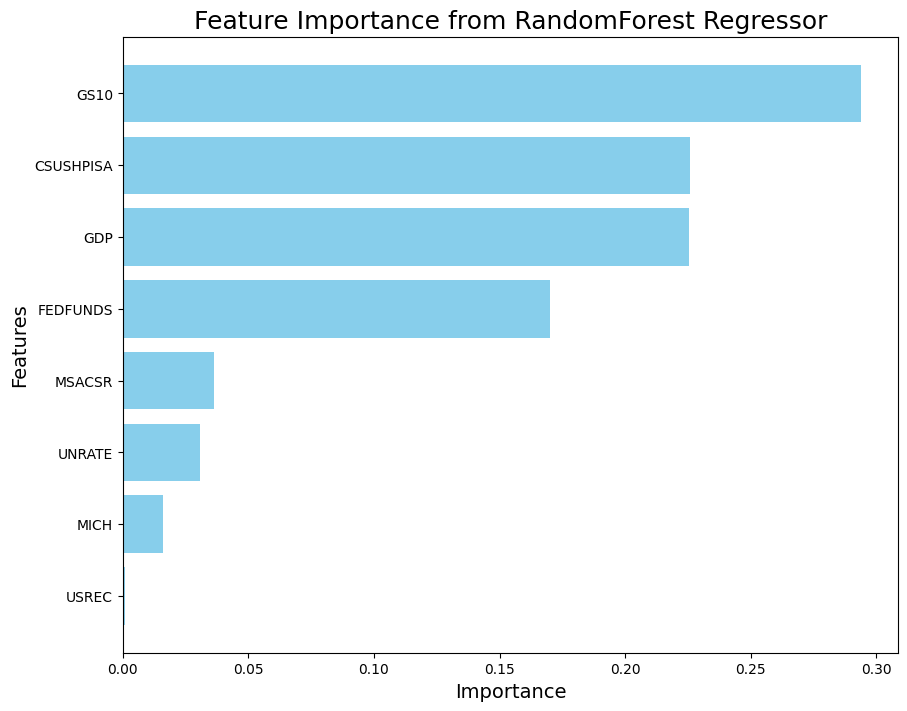

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the  feature importances
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Features'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize =14)
plt.ylabel('Features', fontsize =14)
plt.title('Feature Importance from RandomForest Regressor', fontsize =18)
plt.gca().invert_yaxis()
plt.show()
plt.savefig('../Graph/RandomForest_FeatureImportance.png', dpi = 192);

In [18]:


# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
# Get the best estimator
best_gbr = gs_gbr.best_estimator_



In [19]:

##Get feature importances
feature_importances = best_gbr.named_steps['gbr'].feature_importances_



In [20]:


# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


     Feature  Importance
1       GS10    0.691605
5  CSUSHPISA    0.242580
7        GDP    0.047486
0   FEDFUNDS    0.008484
3     UNRATE    0.005975
6     MSACSR    0.003344
2       MICH    0.000407
4      USREC    0.000120


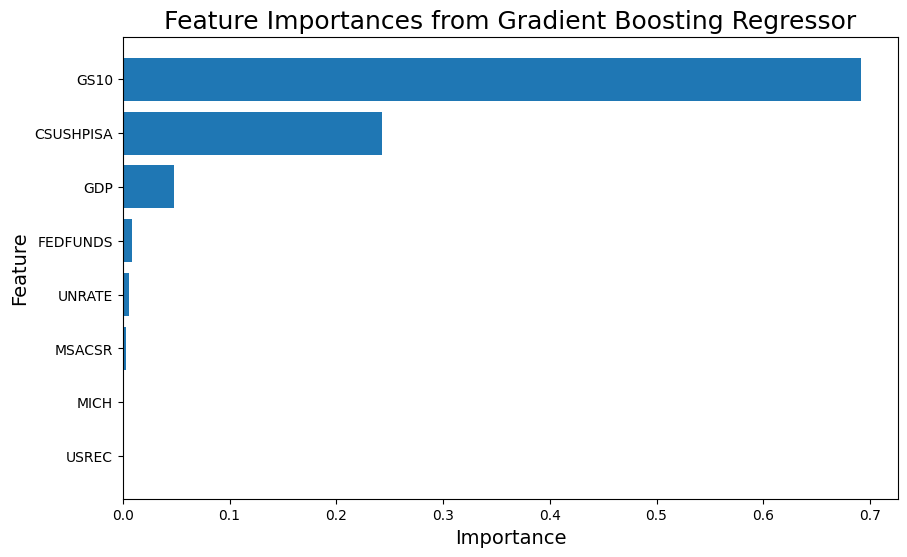

<Figure size 640x480 with 0 Axes>

In [21]:
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Optionally, visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance',fontsize = 14)
plt.ylabel('Feature',fontsize = 14)
plt.title('Feature Importances from Gradient Boosting Regressor', fontsize = 18)
plt.gca().invert_yaxis()
plt.show()
plt.savefig('../Graph/Gradien_boosting_FeatureImportance.png', dpi = 192);

Out of the 4 models created above. The Gradient Boost Regressor had the smallest RMSE of 0.1146 and the Model has Train rsquare: 0.9980419278723321
Test rsquare: 0.997174658033970 and Best CV score: 0.9961905141429664 outperforming the baseline Linear Regression Model and othe ensemble models. The 10 Year US Treasury interest has the highest impact on the MOrtgage rate followed by CSUSHPISA(CSUS National Home Price Index)